In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
ss = pd.read_csv("/kaggle/input/playground-series-s3e17/sample_submission.csv")

In [4]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [6]:
ss.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90954.0,181905.500000,26256.302529,136429.0,159167.25,181905.5,204643.75,227382.0
Air temperature [K],90954.0,299.859493,1.857562,295.3,298.30,300.0,301.20,304.4
Process temperature [K],90954.0,309.939375,1.385296,305.7,308.70,310.0,310.90,313.8
Rotational speed [rpm],90954.0,1520.528179,139.970419,1168.0,1432.00,1493.0,1579.00,2886.0
Torque [Nm],90954.0,40.335191,8.504683,3.8,34.60,40.5,46.20,76.6
Tool wear [min],90954.0,104.293962,63.871092,0.0,48.00,106.0,158.00,253.0
TWF,90954.0,0.001473,0.038355,0.0,0.00,0.0,0.00,1.0
HDF,90954.0,0.005343,0.072903,0.0,0.00,0.0,0.00,1.0
PWF,90954.0,0.002353,0.048449,0.0,0.00,0.0,0.00,1.0
OSF,90954.0,0.003870,0.062090,0.0,0.00,0.0,0.00,1.0


## ON travail avec Train d'abord

In [11]:
train.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

<Axes: >

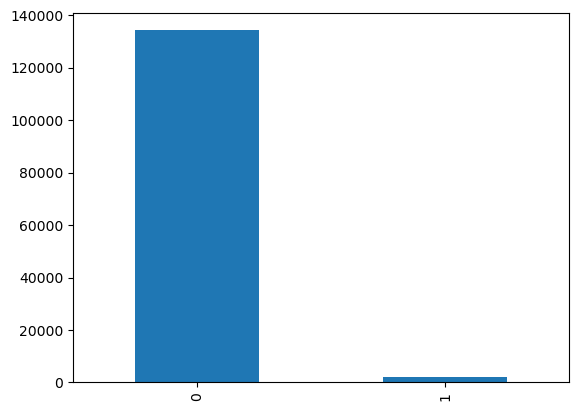

In [12]:
train['Machine failure'].value_counts().plot(kind='bar')


<Axes: >

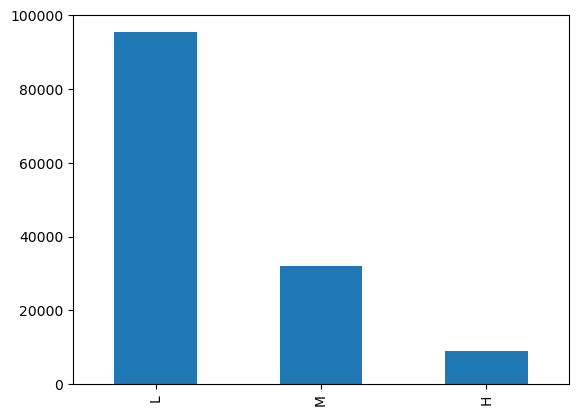

In [13]:
train['Type'].value_counts().plot(kind='bar')

On considere que h represent s pour les t-shorts. on va coder h-->1, m-->2, l-->3

In [14]:
def mapping_type(df):
    # Fonction pour affecte chaque lettre a une valeur numerique
    mapping = {'L':3, 'M':2, 'H':1}
    df['Type'] = df['Type'].map(mapping)
    return df

In [15]:
test = mapping_type(test)

In [16]:
train = mapping_type(train)
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,3,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,3,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Verification pour voir si y'a des manquants dans les donnees

In [17]:
import seaborn as sns

**Note**: Si la couleur est unique cela veut dire que y'a pas de valeur manquantes

In [18]:
train.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

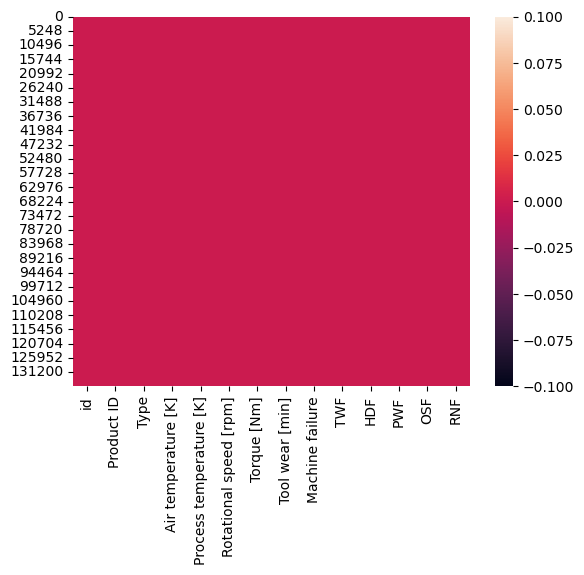

In [19]:
sns.heatmap(train.isna())

### Next et de selection X et y c'est a dire les characteristiques et la variable target(cible)

On cree une liste de colonne qu'on a pas besoin comme en bas

In [20]:
cl2drop = ['id', 'Product ID', 'Machine failure']

In [21]:
y = train['Machine failure']

X = train.drop(cl2drop, axis=1)

In [22]:
X.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,3,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,3,299.3,308.5,1805,26.5,25,0,0,0,0,0


In [23]:
y.head(3)

0    0
1    0
2    0
Name: Machine failure, dtype: int64

# Selection de l'algorithme
on va utiliser l'algorithme RandomForestClassifier

In [24]:
from sklearn.svm import SVC # algorithm

from sklearn.metrics import accuracy_score # matrique d'evaluation

from sklearn.model_selection import train_test_split

# Dvision de donnee en train et test set pour les variables X et y

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
X_train.shape, y_train.shape

((122786, 11), (122786,))

In [27]:
X_test.shape, y_test.shape

((13643, 11), (13643,))

In [28]:
model = SVC( probability=True)

model.fit(X_train, y_train)

SVC(probability=True)

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.9835813237557722

In [31]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,3,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,3,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,3,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [32]:
test = test.drop(['id', 'Product ID'], axis=1)

In [33]:
ss.shape , test.shape

((90954, 2), (90954, 11))

In [34]:
test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,3,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,3,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,3,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [35]:
preds = model.predict_proba(test)

In [36]:
preds[::1]

array([[0.9841498 , 0.0158502 ],
       [0.98897964, 0.01102036],
       [0.98428898, 0.01571102],
       ...,
       [0.98390245, 0.01609755],
       [0.98449601, 0.01550399],
       [0.9843951 , 0.0156049 ]])

In [37]:
ss['Machine failure'] = preds[::1]
ss

,id,Machine failure
0,136429,0.984150
1,136430,0.988980
2,136431,0.984289
3,136432,0.984133
4,136433,0.984146
...,...,...
90949,227378,0.984139
90950,227379,0.984755
90951,227380,0.983902
90952,227381,0.984496


In [38]:
ss.sample(10)

,id,Machine failure
10443,146872,0.986070
39453,175882,0.988894
1374,137803,0.984900
2823,139252,0.983803
37088,173517,0.989657
82485,218914,0.984482
54068,190497,0.984236
26404,162833,0.983811
58830,195259,0.983913
13559,149988,0.984939


In [39]:
ss.to_csv('soumission.csv', index=False)

ValueError: Wrong number of items passed 2, placement implies 1

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier

from sklearn import metrics

In [ ]:
%%time
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=55)

preds = []
scores = []
feature_importance_df = pd.DataFrame()

for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

    model = CatBoostClassifier(
        use_best_model=True, verbose=0, bootstrap_type="Bayesian"
    )
    # model = LGBMClassifier(**params)

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False,
        early_stopping_rounds=100,
    )

    pred_valid = model.predict_proba(X_valid)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred_valid)
    score = metrics.auc(fpr, tpr)
    scores.append(score)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat(
        [feature_importance_df, fold_importance_df], axis=0
    )

    print(f"Fold: {fold + 1} Score: {score}" "\n")
    print("||" * 40, "\n")

    test_preds = model.predict_proba(test)[:, 1]
    preds.append(test_preds)

print(f"Overall Validation Score: {np.mean(scores)}")

In [ ]:
predictions = np.mean(np.column_stack(preds), axis=1)

ss["Machine failure"] = predictions
ss.to_csv("./soumission.csv", index=False)
ss.head()